In [1]:
from sqlalchemy import create_engine
from dotenv import load_dotenv, find_dotenv
import os
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Подготовка данных

In [2]:
# Загрузка переменных окружения
load_dotenv(find_dotenv())

# Cоздаем движок 
engine = create_engine(
    f"postgresql+psycopg2://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}"
    f"@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
)

In [3]:
def select(sql):
    return pd.read_sql(sql, engine)

In [4]:
sql = """
select
    b.card,
    max(max(b.datetime::date)) over() - max(b.datetime::date) as recency,
    count(distinct b.doc_id) as frequency,
    sum(b.summ_with_disc) as monetary
from bonuscheques b  
where length(b.card) = 13
group by b.card;
"""

In [5]:
df_clients = select(sql)
df_clients

,card,recency,frequency,monetary
0,2000200150015,325,1,21
1,2000200150022,184,1,1351
2,2000200150053,84,2,713
3,2000200150091,4,5,3549
4,2000200150107,7,3,1735
...,...,...,...,...
5921,2000200259015,2,1,664
5922,2000200259381,2,1,245
5923,2000200259398,2,1,395
5924,2000200259404,1,1,784


In [6]:
df_clients.isnull().mean()

card         0.0
recency      0.0
frequency    0.0
monetary     0.0
dtype: float64

In [7]:
df_clients.dtypes

card         object
recency       int64
frequency     int64
monetary      int64
dtype: object

In [8]:
df_clients.describe()

,recency,frequency,monetary
count,5926.000000,5926.000000,5926.000000
mean,113.374958,3.556193,3228.801552
std,95.150133,6.253233,6670.663099
min,0.000000,1.000000,21.000000
25%,30.000000,1.000000,724.000000
50%,87.000000,2.000000,1470.500000
75%,183.000000,4.000000,3297.000000
max,332.000000,217.000000,162687.000000


In [9]:
sns.set(rc={'figure.figsize':(11, 5.5)}, style='whitegrid', font_scale=1.5)

# Распределения recency

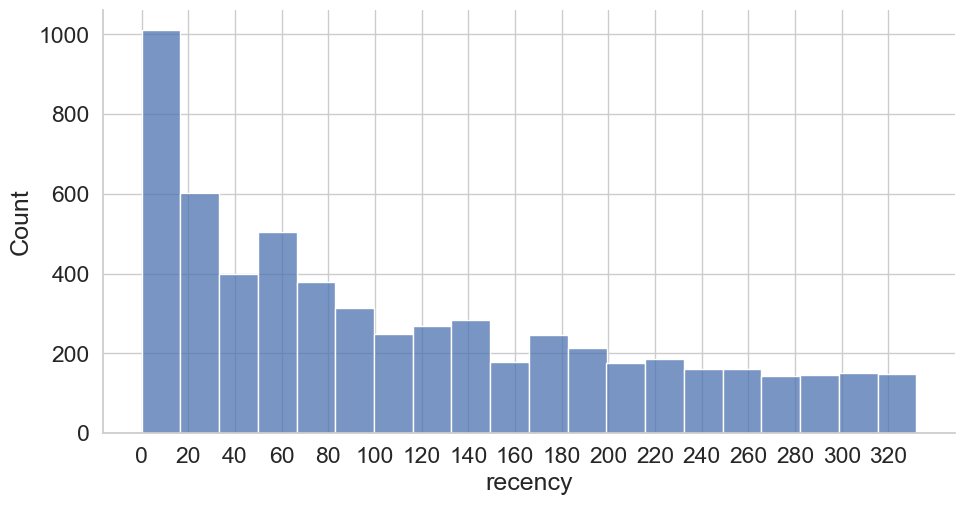

In [10]:
recency_hist = sns.histplot(df_clients['recency'])
recency_hist.set(xticks=np.arange(0, df_clients['recency'].max(), 20))
sns.despine()

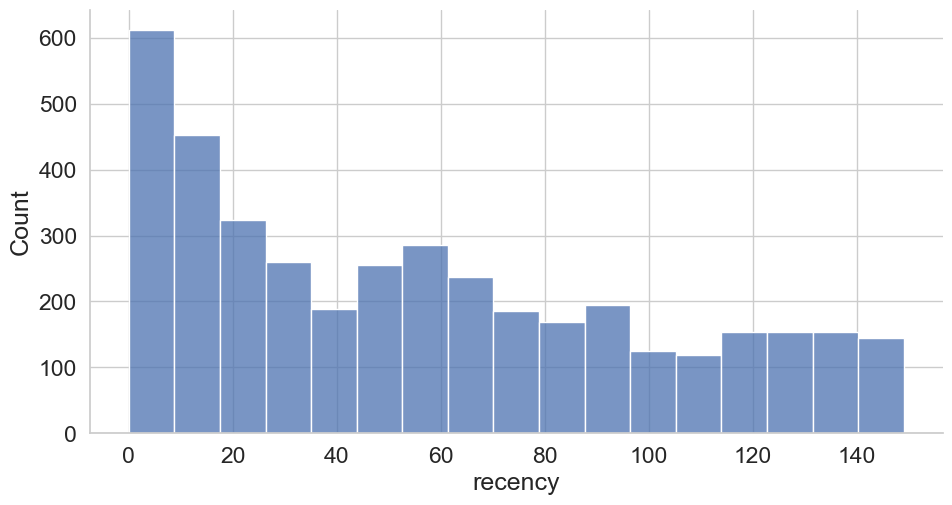

In [11]:
sns.histplot(data=df_clients.query("recency < 150"), x='recency')
sns.despine()

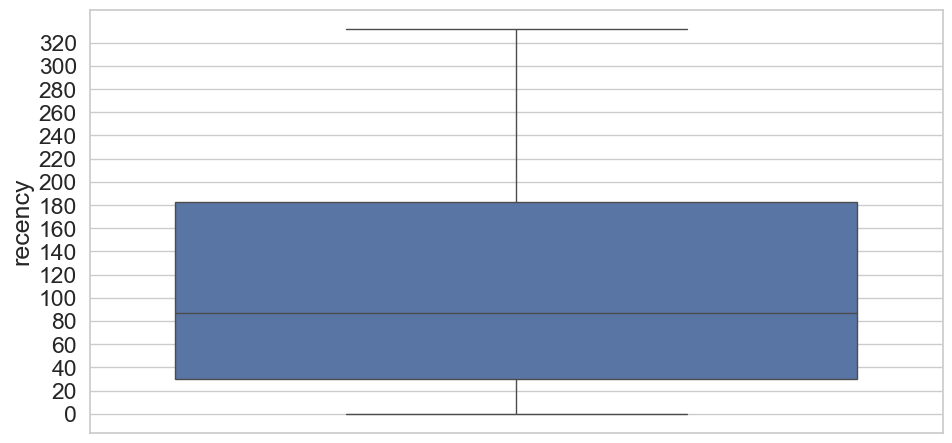

In [12]:
recency_box = sns.boxplot(df_clients['recency'])
recency_box.set(yticks=np.arange(0, df_clients['recency'].max(), 20))
plt.show()

In [13]:
np.percentile(df_clients['recency'], 20, method='higher') # Вывод: 21

21

In [14]:
np.percentile(df_clients['recency'], 51, method='higher') # Вывод: 90

90

# Распределения frequency

<Axes: xlabel='frequency', ylabel='Count'>

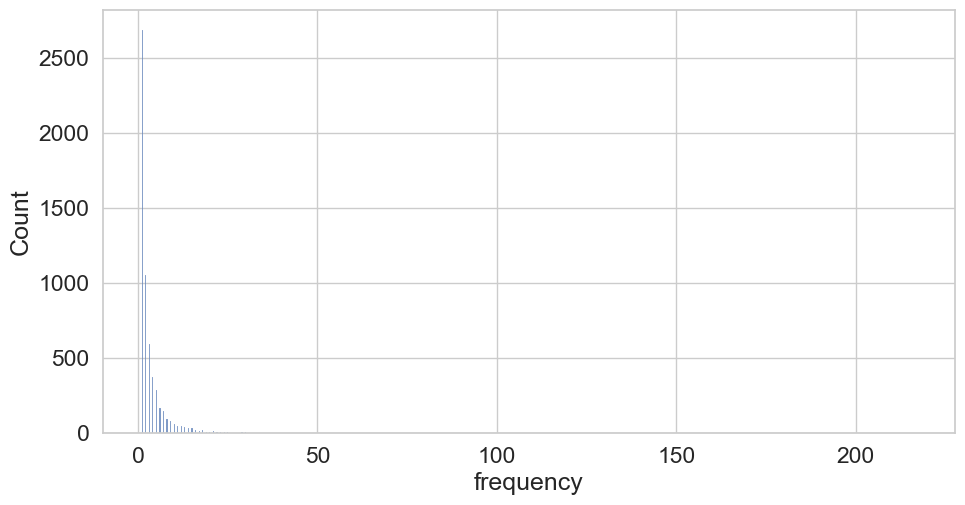

In [15]:
sns.histplot(df_clients['frequency'])

In [16]:
np.percentile(df_clients['frequency'], 98) # Вывод: 18

18.0

In [17]:
np.percentile(df_clients['frequency'], 95) # Вывод: 12

12.0

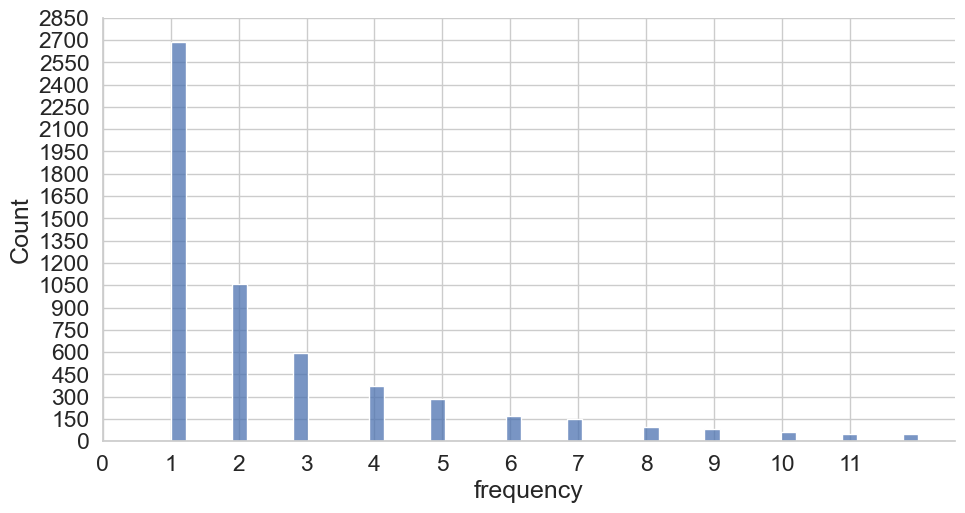

In [18]:
freq_hist = sns.histplot(data=df_clients.query("frequency <= 12"), x='frequency')
freq_hist.set(xticks=np.arange(0, 12, 1), yticks=np.arange(0, 3000, 150))
sns.despine()

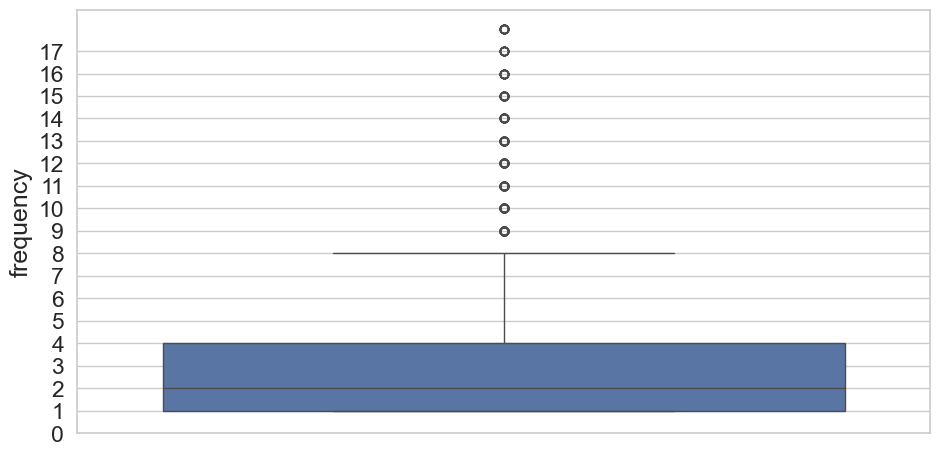

In [19]:
freq_box = sns.boxplot(data=df_clients.query("frequency <= 18"), y='frequency')
freq_box.set(yticks=np.arange(0, 18, 1))
plt.show()

In [20]:
np.percentile(df_clients['frequency'], 50, method='higher') # Вывод: 2

2

In [21]:
np.percentile(df_clients['frequency'], 85, method='higher') # Вывод: 6

6

# Распределения monetary

<Axes: xlabel='monetary', ylabel='Count'>

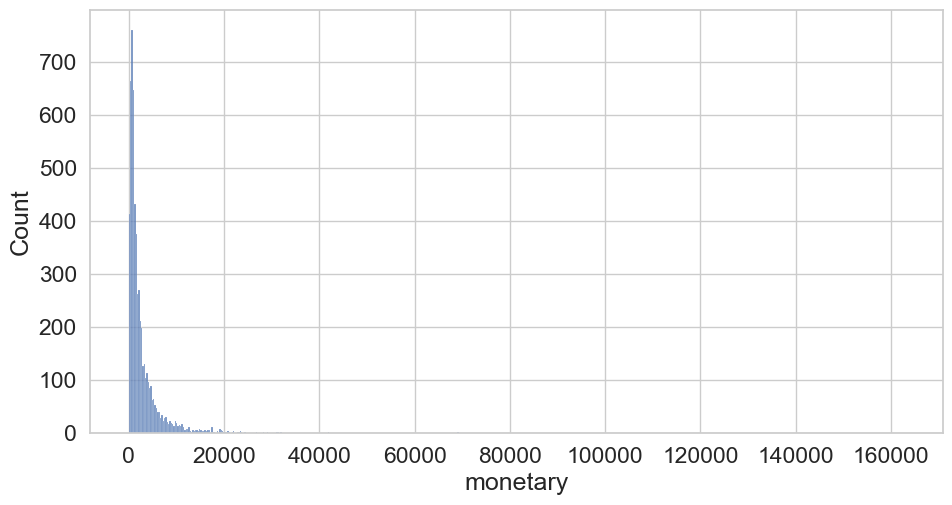

In [22]:
sns.histplot(df_clients['monetary'])

In [23]:
np.percentile(df_clients['monetary'], 98) # Вывод 19156

19156.0

In [24]:
np.percentile(df_clients['monetary'], 95) # Вывод 10951.5

10951.5

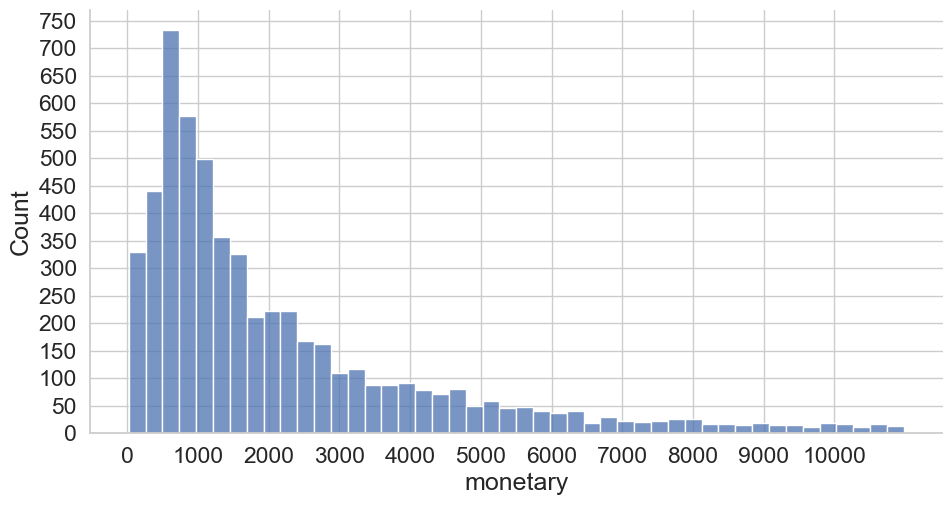

In [25]:
hist_monetary = sns.histplot(data=df_clients.query("monetary < 11000"), x='monetary')
hist_monetary.set(xticks=np.arange(0, 11000, 1000), yticks=np.arange(0, 800, 50))
sns.despine()

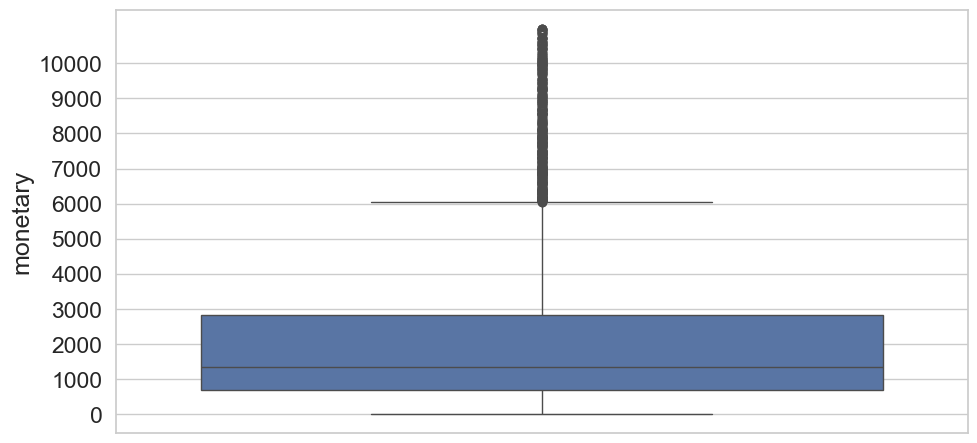

In [26]:
monetary_box = sns.boxplot(data=df_clients.query("monetary < 11000"), y='monetary')
monetary_box.set(yticks=np.arange(0, 11000, 1000))
plt.show()

In [27]:
np.percentile(df_clients['monetary'], 67, method='higher') # Вывод: 2479

2479

In [28]:
np.percentile(df_clients['monetary'], 90, method='higher') # Вывод: 6909

6909